---
title: "frequencies"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## spectrum

In the 17th century, Isaac Newton studied how white light can be decomposed into the colors of the rainbow. He called the decomposed colors "**spectrum**", after the latin word for image. Later, the word spectrum started to be used in other contexts involving a range of frequencies, even when not related to light or colors.

![](newton_prism.jpg)

::: {.column-margin}
Source: [Smithsonian Libraries](https://library.si.edu/exhibition/color-in-a-new-light/science)
:::

## resolution
The Discrete Fourier Transform helps us decompose a discrete time series into a list of (complex) weights for a range of frequencies, or spectrum. 
Its formula is given by

$$
F_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i \frac{k}{N}n},
$$

where $F_k$ is the array representing the Fourier transform $F(\xi)$, and $x_n$ is the array representing the time series $f(t)$.
All the information contained in $f(t)$ is fully preserved in $F(\xi)$.

What are the lowest and highest frequencies that can be measured?


In [36]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import matplotlib.gridspec as gridspec
import math
import scipy
# %matplotlib widget

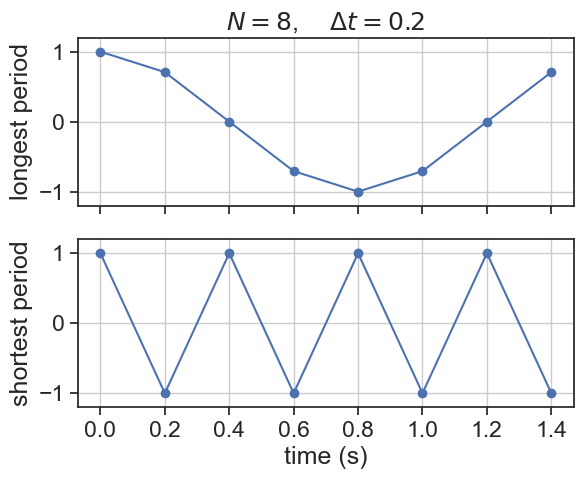

In [37]:
fig, ax = plt.subplots(2, 1, sharex=True)

N = 8
dt = 0.2
T1 = N * dt
T2 = 2 * dt
time = dt * np.arange(N)
f1 = np.cos(2.0*np.pi*time/T1)
f2 = np.cos(2.0*np.pi*time/T2)

ax[0].plot(time, f1, '-o')
ax[1].plot(time, f2, '-o')

ax[0].set(ylim=[-1.2, 1.2],
          ylabel="longest period",
          title="$N=8$, $\quad \Delta t=0.2$")
ax[1].set(xticks=time,
          xlabel="time (s)",
          ylim=[-1.2, 1.2],
          ylabel="shortest period")
ax[0].grid()
ax[1].grid()

The longest possible period that we can measure is the length of the time series itself:

$$
T_\text{long} = N\times \Delta t
$$

The shortest possible period is twice the time resolution:

$$
T_\text{short} = 2\times \Delta t
$$

Let's translate this into frequency. Because frequency is the inverse of period $(\xi = \frac{1}{T})$, the smallest possible frequency is the inverse of the longest possible period, and vice versa.

$$
\begin{split}
\xi_\text{small} &= \frac{1}{T_\text{long}} = \frac{1}{N\times \Delta t}\\
\xi_\text{large} &= \frac{1}{T_\text{short}} = \frac{1}{2\times \Delta t}
\end{split}
$$


There is a duality between the variables time ($t$) and frequency ($\xi$). It is important to understand how to convert from one the the other in the context of DFTs:

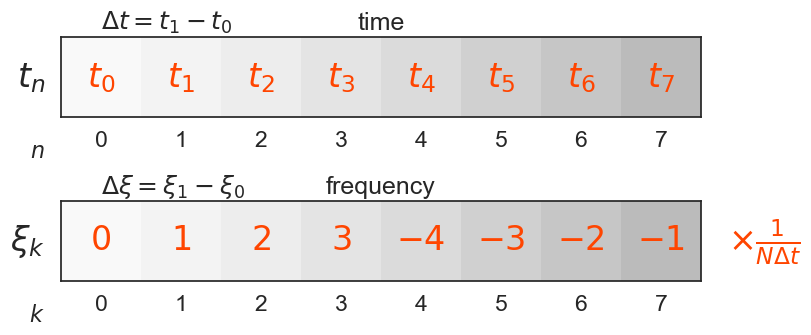

In [38]:
#| code-summary: "plot t and xi"
fig = plt.figure(1, figsize=(8,4))

gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[1,1])
gs.update(left=0.10, right=0.90,top=0.90, bottom=0.10,
          hspace=0.05, wspace=0.05
         )
ax_t = plt.subplot(gs[0, 0])
ax_k = plt.subplot(gs[1, 0])

text_dict = {'ha':'center', 'va':'center', 'color':"orangered",
                'fontsize':24, 'weight':'bold'}
N = 8
t_vector = np.arange(N)
k_vector = np.fft.fftfreq(N, d=1.0)
t_vector = t_vector.reshape(1, len(t_vector))
k_vector = N * k_vector.reshape(1, len(k_vector))

ax_t.imshow(t_vector, cmap='Greys', vmin=-1, vmax=20, origin="lower")
ax_k.imshow(t_vector, cmap='Greys', vmin=-1, vmax=20, origin="lower")

for (j,i),label in np.ndenumerate(t_vector):
    ax_t.text(i, j, fr"$t_{label:.0f}$", **text_dict)
for (j,i),label in np.ndenumerate(k_vector):
    ax_k.text(i, j, fr"${label:.0f}$", **text_dict)
ax_t.set(yticks=[], xticks=np.arange(N), title="time")
# ax_t.set_ylabel(r"$t_n$", rotation="horizontal", ha="center")
ax_t.text(-0.7, 0, r"$t_n$", ha="right", va="center", fontsize=24)
ax_t.text(-0.7, -1.0, r"$n$", ha="right", fontsize=16)
ax_k.text(-0.7, 0, r"$\xi_k$", ha="right", va="center", fontsize=24)
ax_k.text(-0.7, -1.0, r"$k$", ha="right", fontsize=16)

ax_k.set(yticks=[], xticks=np.arange(N), title="frequency")
# ax_k.yaxis.set_label_position("right")
# ax_k.set_ylabel(r"$\times\frac{1}{N\Delta t}$", rotation="horizontal", labelpad=20)
ax_k.text(8.3, 0, r"$\times\frac{1}{N\Delta t}$", **text_dict)
ax_t.tick_params(axis='x', which='both', bottom=False)
ax_k.tick_params(axis='x', which='both', bottom=False)
ax_t.text(0, 0.6, r"$\Delta t = t_1 - t_0$")
ax_k.text(0, 0.6, r"$\Delta \xi = \xi_1 - \xi_0$")
pass

Why is there such a weird pattern for $\xi$, where first we have the positive values, and after that the negative? Let's see again the equation for the DFT:

$$
F_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i \frac{k}{N}n},
$$

What happens to the location of $x_1$ as we increase the index $k$?

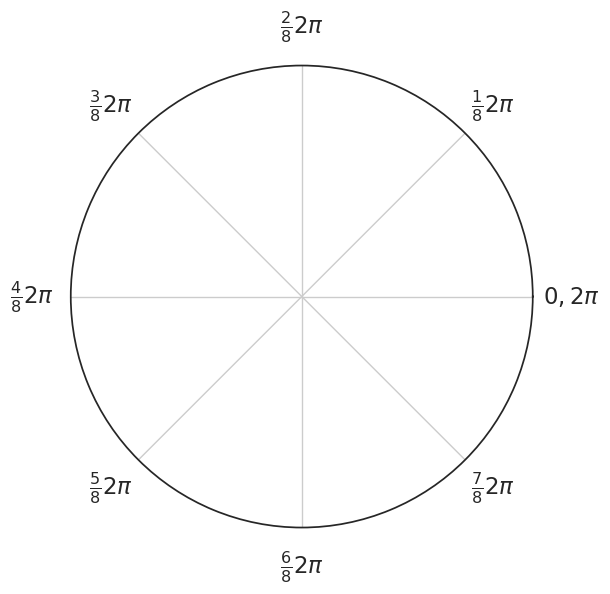

In [49]:
fig, ax = plt.subplots(1, figsize=(6, 6), subplot_kw=dict(polar=True))

N = 8
k = np.arange(8)
angles = 2.0 * np.pi * k * 1 / N 

# for i in range(N):
#     ax[i].plot([theta[i]]*2, [0, 1], lw=2, color="tab:red")

# stems = ax.stem(theta, r)
# for artist in stems.get_children():
#     artist.set_clip_on(False)

theta_ticks = 2.0*np.pi * np.arange(8)/8
theta_tick_labels = [r"$0,2\pi$",
                     r"$\frac{1}{8}2\pi$",
                     r"$\frac{2}{8}2\pi$",
                     r"$\frac{3}{8}2\pi$",
                     r"$\frac{4}{8}2\pi$",
                     r"$\frac{5}{8}2\pi$",
                     r"$\frac{6}{8}2\pi$",
                     r"$\frac{7}{8}2\pi$",
                    ]

ax.set(yticks=[],
       xticks=theta_ticks,
       xticklabels=theta_tick_labels,
       ylim=(0, 1))
# # ax.set_xticks(theta_ticks, theta_tick_labels, pad=10)
ax.tick_params(axis='x', which='major', pad=15)
# ax.grid(False)
# # ax.set_clip_on(False)

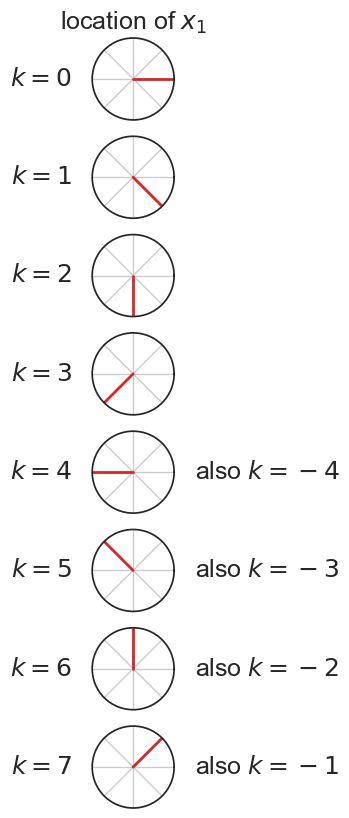

In [56]:
N = 8
r = [1] * N
k = np.arange(8)
theta = -2.0 * np.pi * k * 1 / N #np.arange(1,N+1) * 2.0 * np.pi / N

fig, ax = plt.subplots(N, 1, figsize=(30, 10), subplot_kw=dict(polar=True))

for i in range(N):
    ax[i].plot([theta[i]]*2, [0, 1], lw=2, color="tab:red")
    ax[i].set(yticks=[],
              xticks=theta_ticks,
              xticklabels=[],
              ylim=(0, 1))
    ax[i].text(np.pi, 1.5, fr"$k={i}$", ha="right", va="center")

ax[0].set(title=r"location of $x_1$")

for i in range(4,8):
    ax[i].text(0, 1.5, fr"also $k={i-8}$", ha="left", va="center")


# stems = ax.stem(theta, r)
# for artist in stems.get_children():
#     artist.set_clip_on(False)

# theta_ticks = 2.0*np.pi * np.arange(8)/8
# theta_tick_labels = [r"$0,2\pi$",
#                      r"$\frac{1}{8}2\pi$",
#                      r"$\frac{2}{8}2\pi$",
#                      r"$\frac{3}{8}2\pi$",
#                      r"$\frac{4}{8}2\pi$",
#                      r"$\frac{5}{8}2\pi$",
#                      r"$\frac{6}{8}2\pi$",
#                      r"$\frac{7}{8}2\pi$",
#                     ]


# # ax.set_xticks(theta_ticks, theta_tick_labels, pad=10)
# ax.tick_params(axis='x', which='major', pad=15)
# ax.grid(False)
# # ax.set_clip_on(False)

## Nyquist–Shannon sampling theorem

This part is partially based on [All About Circuits](https://www.allaboutcircuits.com/technical-articles/nyquist-shannon-theorem-understanding-sampled-systems/).

We saw above that when sampling at a $\Delta t$, the shortest possible period is $2\Delta t$. This is the Nyquist rate.

<div class="alert alert-info">
**Theorem**

If a system uniformly samples an analog signal at a rate that exceeds the signal’s highest frequency by at least a factor of two, the original analog signal can be perfectly recovered from the discrete values produced by sampling.
</div>

Conversely, we can negate the statement above, saying that:

> If we sample an analog signal at a frequency that is lower than the Nyquist rate, we will not be able to perfectly reconstruct the original signal.  

As an example, let's sample a cosine wave whose frequency is 1 Hz at various sampling rates.

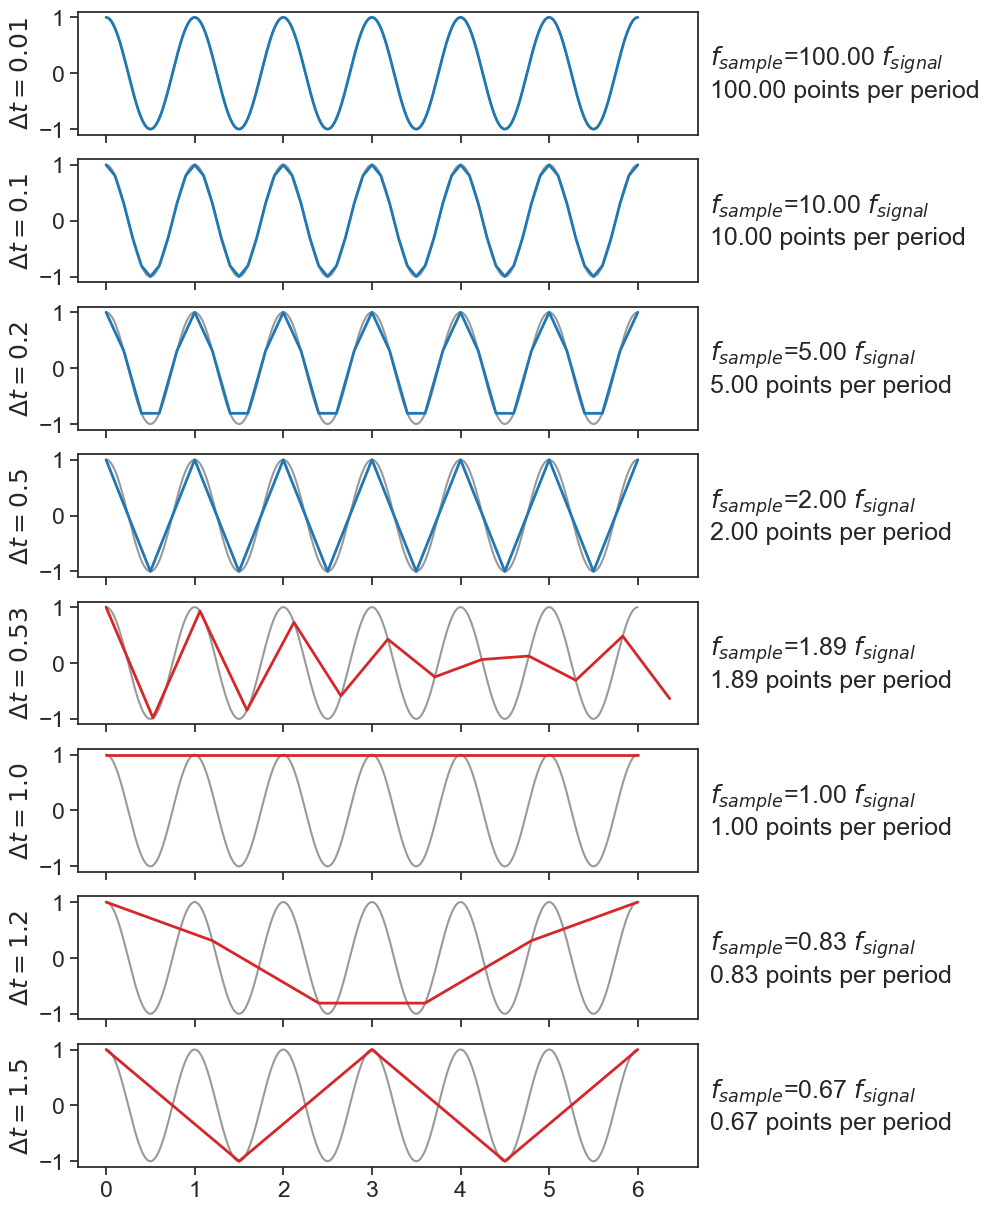

In [92]:
dt_list = [0.01, 0.1, 0.2, 0.5, 0.53, 1.0, 1.2, 1.5]

fig, ax = plt.subplots(len(dt_list), 1, figsize=(8, 15), sharex=True)

T_total = 6.0 # seconds

func = lambda t: np.cos(2.0 * np.pi * t)

t_high = np.arange(0, T_total, 0.001)
signal = func(t_high)

for i, dt in enumerate(dt_list):
    time = np.arange(0, T_total+dt, dt)
    ax[i].plot(t_high, signal, color="black", alpha=0.4)
    c = "tab:blue"
    if dt > 0.5: c = "tab:red"
    ax[i].plot(time, func(time), lw=2, color=c)
    ax[i].set(ylabel=fr"$\Delta t = {dt}$")
    text = r"$f_{sample}$"+rf"={1/dt:.2f}"+r" $f_{signal}$"+f"\n{1/dt:.2f} points per period"
    ax[i].text(1.02, 0.50, text, transform=ax[i].transAxes,
         horizontalalignment='left', verticalalignment='center',)

Sampling at a $\Delta t$ greater than 0.5